<a href="https://colab.research.google.com/github/Deepayanbasu07/ML-for-Band-Gap-Prediction/blob/main/Crystal_Features__Atomic_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning for Materials Science :


###Using Crystal Features to predict the Band Gap




Example problems that machine learning solve:

1. Is a given material metallic or semiconducting? An example paper: https://doi.org/10.1038/ncomms15679.
2. What is the specific heat capacity of a material? An example paper: https://doi.org/10.1002/adts.201900208.

### The Materials Project Database:


The Materials Project is a multi-institution, multi-national effort to compute the properties of all inorganic materials and provide the data and associated analysis algorithms for every materials researcher free of charge. The ultimate goal of the initiative is to drastically reduce the time needed to invent new materials by focusing costly and time-consuming experiments on compounds that show the most promise computationally.


### Machine Learning Workflow

We can think of machine learning as a 3-step process:

1. First, find numerical/categoricall descriptors that can describe your material. That is: every material in your dataset should be uniquely represented by an array of numbers/categories.
2. Then, apply your procedure to your entire dataset of structures to form a sheet of material descriptors vs. target properties.
3. Use machine learning to predict the target properties based on the descriptors.

#### Diagram

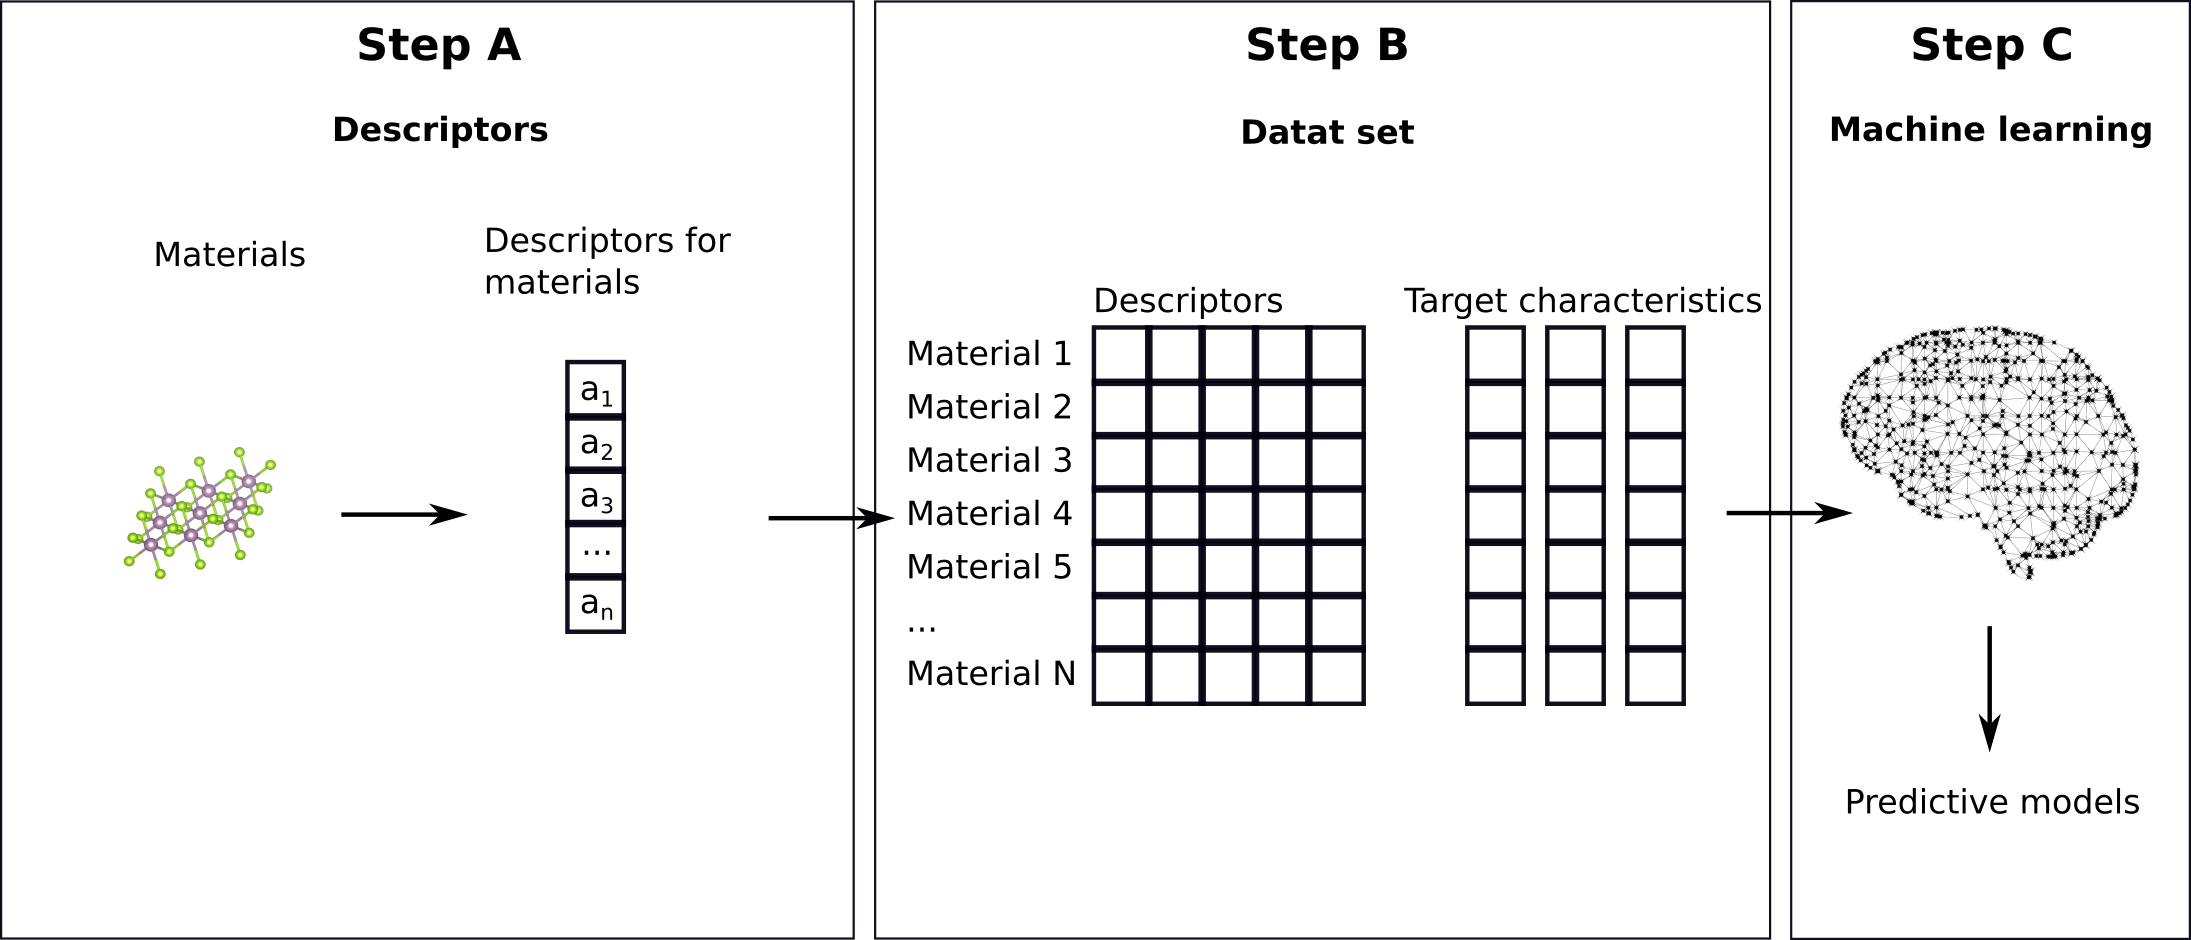

In [ ]:
img = '/content/fig_Workflow.png'
from IPython.display import Image
Image(img, height =500)

### A look at MaterialsProject

1. Each material on MP is identified by an ID that goes like mp-X where X is a number. The ID of diamond is mp-66. People use these identifiers when referring to MP materials in papers, and we will use them soon when we start querying materials from MP using python.

2. There you will find the crystal structure, the lattice parameters, the basic properties (in a column to the right of the figure that displays the crystal), and then a range of DFT-calculated properties.

### The DFT properties
These are quantities that are calculated for each crystal in MP. In fact, every thing you see on the MP page for diamond was calculated using DFT.

1. For a given elemental composition, the lattice parameters and the positions of the atoms within the lattice are all obtained using DFT.
2. For the obtained crystal structure, the Final Magnetic Moment, Formation Energy / Atom, Energy Above Hull / Atom, Band Gap are calculated. The Density is derived from the obtained crystal structure.
3. Further DFT calculations are performed to obtain the band structure as well as other properties that you can find as you scroll down the structure page on MP.
4. Some of the crystals on MP correspond to crystals that exist in nature, and some are purely hypothetical. The hypothetical crystals have been generated by some algorithm that uses artificial intelligence, or probably by simple elemental substitution.

### The PyMatGen python library

To be able to query the MP database, the MP team provided the community with a python library. The first thing we do here is to install PyMatGen in Colab.

PyMatGen is downloaded in the Google Colab Environment.

In [ ]:
pip install pymatgen

In [ ]:
pip install mp-api

In [ ]:
with open('apikey.txt', 'r') as file:
    apikey = file.read().strip()

In [ ]:
from mp_api.client import MPRester
with MPRester(api_key= apikey) as mpr:
    data = mpr.materials.search(material_ids=["mp-696128"])

/usr/local/lib/python3.10/dist-packages/paramiko/pkey.py:100: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
/usr/local/lib/python3.10/dist-packages/paramiko/transport.py:259: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
structure = data[0].structure
print(structure)

Full Formula (Li20 Ge2 P4 S24)
Reduced Formula: Li10Ge(PS6)2
abc   :   8.787646   8.787646  12.657546
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (50)
  #  SP           a         b         c    magmom
---  ----  --------  --------  --------  --------
  0  Li    0.228698  0.27295   0.294563        -0
  1  Li    0.771302  0.72705   0.294563        -0
  2  Li    0.27295   0.771302  0.794563        -0
  3  Li    0.72705   0.228698  0.794563        -0
  4  Li    0.228698  0.72705   0.294563        -0
  5  Li    0.771302  0.27295   0.294563        -0
  6  Li    0.27295   0.228698  0.794563        -0
  7  Li    0.72705   0.771302  0.794563        -0
  8  Li    0         0         0.93973         -0
  9  Li    0         0         0.43973         -0
 10  Li    0.5       0.5       0.54802         -0
 11  Li    0.5       0.5       0.04802         -0
 12  Li    0.256318  0.724772  0.036663        -0
 13  Li    0.743682  0.275228  0.036663        -0
 14  

So now we have the details of CIF structure in a human readable format which includes the formula, the lattice parameters and the positions of the atoms in the crystals.

### Lets see some structure details

In [ ]:
structure.lattice

Lattice
    abc : 8.787646 8.787646 12.657546
 angles : 90.0 90.0 90.0
 volume : 977.4501587615295
      A : 8.787646 0.0 0.0
      B : 0.0 8.787646 0.0
      C : 0.0 0.0 12.657546
    pbc : True True True

In [ ]:
structure.density

2.000486820477457

In [ ]:
structure.species

[Element Li,
 Element Li,
 Element Li,
 Element Li,
 Element Li,
 Element Li,
 Element Li,
 Element Li,
 Element Li,
 Element Li,
 Element Li,
 Element Li,
 Element Li,
 Element Li,
 Element Li,
 Element Li,
 Element Li,
 Element Li,
 Element Li,
 Element Li,
 Element Ge,
 Element Ge,
 Element P,
 Element P,
 Element P,
 Element P,
 Element S,
 Element S,
 Element S,
 Element S,
 Element S,
 Element S,
 Element S,
 Element S,
 Element S,
 Element S,
 Element S,
 Element S,
 Element S,
 Element S,
 Element S,
 Element S,
 Element S,
 Element S,
 Element S,
 Element S,
 Element S,
 Element S,
 Element S,
 Element S]

In [ ]:
structure.charge

0

In [ ]:
structure.cart_coords

array([[ 2.00971706,  2.39858798,  3.72844472],
       [ 6.77792894,  6.38905802,  3.72844472],
       [ 2.39858798,  6.77792894, 10.05721772],
       [ 6.38905802,  2.00971706, 10.05721772],
       [ 2.00971706,  6.38905802,  3.72844472],
       [ 6.77792894,  2.39858798,  3.72844472],
       [ 2.39858798,  2.00971706, 10.05721772],
       [ 6.38905802,  6.77792894, 10.05721772],
       [ 0.        ,  0.        , 11.8946757 ],
       [ 0.        ,  0.        ,  5.5659027 ],
       [ 4.393823  ,  4.393823  ,  6.93658836],
       [ 4.393823  ,  4.393823  ,  0.60781536],
       [ 2.25243185,  6.36903977,  0.46406361],
       [ 6.53521415,  2.41860623,  0.46406361],
       [ 2.41860623,  2.25243185,  6.79283661],
       [ 6.36903977,  6.53521415,  6.79283661],
       [ 2.41860623,  6.53521415,  6.79283661],
       [ 6.36903977,  2.25243185,  6.79283661],
       [ 2.25243185,  2.41860623,  0.46406361],
       [ 6.53521415,  6.36903977,  0.46406361],
       [ 4.393823  ,  4.393823  , 10.139

In [ ]:
structure.atomic_numbers

(3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 32,
 32,
 15,
 15,
 15,
 15,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16)

### Querying structures using PyMatGen
Now lets see PyMatGen to query structures from MP. To be able to do that, we first need to use MPRester as mpr.

Lets make a simple query to get Material Ids for all such materials with band gap larger than 5 and less than 8.

In [ ]:
 results = mpr.materials.summary.search(band_gap = (5,8) , fields=["material_id"])

Retrieving SummaryDoc documents:   0%|          | 0/3672 [00:00<?, ?it/s]

Note that this operation takes some time as there are different number of such materials.
So now lets take a look at the MP Ids we got. This code shows the total count and the first 5 MP Ids.

In [ ]:
print(len(results))


3672


In [ ]:
results[:5]

In [ ]:
new_results = []
for result in results:
  new_results.append( ( "material_id", result.material_id) )

print(new_results[:5])


[('material_id', MPID(mp-27971)), ('material_id', MPID(mp-977360)), ('material_id', MPID(mp-985278)), ('material_id', MPID(mp-569787)), ('material_id', MPID(mp-1229076))]


### PART 2

 ### A very important question that lies at the centre of the field of ML-driven material discovery: how do we apply ML to predict crystal properties?

### Some Background About Molecules and Crystals
1. A Crystal is structure that is endowed with periodicity
2.  Molecules are fundamentally different from crystals because of the pattern (periodicity)
3. A molecule is just that one single molecule, sitting on its own, in isolation, whereas a crystal is really composed of an infinite number of molecules.

### Common Obvious Question Comes:
##### How would the pattern in the crystal make ML for molecules different from ML for crystals?
To predict the properties of the molecules one can derive a set of descriptors for the molecules in the data set that are based on the positions of the atoms within the molecule. **One can derive descriptors based on the relative positions, in order to ensure that the descriptors are invariant to transformations: rotation and translation.**

The key thing here in the molecular descriptors is that they are based on the atomic positions. **In crystals, we can't really use atomic positions like we did with molecules to obtain descriptors. Why?**


Because there are many different ways we can represent the unit cell of a crystal. Therefore, we cannot use the atomic coordinates to derive descriptors for crystals, otherwise the derived descriptors, such as the eigenvalues of the Coulomb matrix in the case of molecules, will change dramatically for the same crystal. That is, **the descriptor vector is not invariant with respect to translation of the unit cell**.What do we do then?

### USE OF DESCRIPTORS
We can use some statistics of atomic properties as the descriptor vector. For example
1. Average of the atomic numbers of all these elements in the crystal. For e.g., in SiC, the average would be 14(Si)+6(C)/2 = 10
2. The average of Ionization potential of the atoms
3. The average of Electron Affinity of the atoms
4. And more Averages
5. Other statistics, such as the standard deviation and the variance. Adding those will triple the number elements in the descriptor vector above.


### However there is a Problem:
A lot of materials exist in various phases. That is, for the same atomic composition, let's say SiC, there are several possible structures. Right now, there are 27 possible structures for SiC on MaterialsProject.org.

So, the above descriptors won't work. For example, for the case of SiC, all of the 27 SiC phases in MP will have the same values for the statistical values above.

To solve this problem, we have to add descriptors** based on the geometrical arrangement of atoms**. A simple such descriptor is to average the bond lengths (a bond is formed between two atoms).

In [ ]:
import numpy as np
structure = data[0].structure
#type(structure)
mean_atomic_num = np.mean(structure.atomic_numbers)
max_atomic_num = np.max(structure.atomic_numbers)
min_atomic_num = np.min(structure.atomic_numbers)
std_atomic_num = np.std(structure.atomic_numbers)
print(mean_atomic_num)
print(max_atomic_num)
print(min_atomic_num)

11.36
32
3


In [ ]:
mean_distance_matrix = np.mean(structure.distance_matrix)
max_distance_matrix = np.max(structure.distance_matrix)
min_distance_matrix = np.min(structure.distance_matrix)
std_distance_matrix = np.std(structure.distance_matrix)

print(mean_distance_matrix, max_distance_matrix,
      min_distance_matrix, std_distance_matrix)

4.959714072129139 8.86931388531193 0.0 1.649027299561301


### Building the Dataset

### Step 1: Collecting the structures
We want to predict the bandgaps of structures, so we need to collect the structures (dataset) along with their corresponding bandgaps (target vector).

We will focus on stoichiometric perovskites: these are materials of the form ABC3. The followiing query will collect the CIFs and bandgaps for these materials from MP.

In [ ]:
results = mpr.materials.summary.search(formula="ABC3", # Replace "ABC3" with a valid chemical formula
                                       fields=["material_id", "band_gap"])

Retrieving SummaryDoc documents:   0%|          | 0/4555 [00:00<?, ?it/s]

In [ ]:
results[0:5]

In [ ]:
# prompt: get all the material ids from the above result

material_ids = [result.material_id for result in results]
print(material_ids[:5])

[MPID(mp-1183115), MPID(mp-1183052), MPID(mp-866101), MPID(mp-864606), MPID(mp-861502)]


### Step 2: Pre-Processing


In [ ]:
from pymatgen.io.cif import CifParser
from urllib.request import urlopen
import pandas as pd
from pymatgen.ext.matproj import MPRester
from pymatgen.ext.matproj import MPRestError
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
def descriptors(material_id):

    atomic_numbers = []

    distance_matrix = []
    van_der_waals_radius = []
    electrical_resistivity = []
    velocity_of_sound = []
    reflectivity = []
    poissons_ratio = []
    molar_volume = []
    thermal_conductivity = []
    melting_point = []
    critical_temperature = []
    superconduction_temperature = []
    liquid_range = []
    bulk_modulus = []
    youngs_modulus = []
    brinell_hardness = []
    rigidity_modulus = []
    # mineral_hardness = []
    vickers_hardness = []
    density_of_solid = []
    coefficient_of_linear_thermal_expansion = []
    average_ionic_radius = []
    average_cationic_radius = []
    average_anionic_radius = []

    with MPRester(api_key= apikey) as mpr:
        data = mpr.materials.search(material_ids=[material_id])

    structure = data[0].structure


    numElements = len(structure.atomic_numbers)

    num_metals = 0
    for e in structure.species:
        if e.Z in range(3, 4+1) or e.Z in range(11, 12+1) or e.Z in range(19, 30+1) or e.Z in range(37, 48+1) or e.Z in range(55, 80 + 1) or e.Z in range(87, 112+1):
            num_metals += 1
    metals_fraction = num_metals/numElements

    spg = structure.get_space_group_info()

    spacegroup_numbers = {}
    for i in range(1, 231):
        spacegroup_numbers[i] = 0

    spacegroup_numbers[spg[1]] = 1

    spacegroup_numbers_list = []
    for i in range(1, 231):
        spacegroup_numbers_list += [spacegroup_numbers[i]]

    atomic_numbers = [np.mean(structure.atomic_numbers), np.max(structure.atomic_numbers), np.min(
        structure.atomic_numbers), np.std(structure.atomic_numbers)]

    # Lattice parameters:
    a_parameters = structure.lattice.abc[0]
    b_parameters = structure.lattice.abc[1]
    c_parameters = structure.lattice.abc[2]
    alpha_parameters = structure.lattice.angles[0]
    beta_parameters = structure.lattice.angles[1]
    gamma_parameters = structure.lattice.angles[2]

    distance_matrix += [np.mean(structure.distance_matrix), np.max(structure.distance_matrix),
                        np.min(structure.distance_matrix), np.std(structure.distance_matrix)]

    e1, e2, e3, e4, e5, e6, e7, e8, e9, e10, e11, e12, e13, e14, e15, e16, e17, e18, e19, e20, e21, e22, e23 = [
    ], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []
    for e in structure.species:
        e1 += [e.van_der_waals_radius]
        e2 += [e.electrical_resistivity]
        e3 += [e.velocity_of_sound]
        e4 += [e.reflectivity]
        e6 += [e.poissons_ratio]
        e7 += [e.molar_volume]
        e8 += [e.thermal_conductivity]
        e9 += [e.melting_point]
        e10 += [e.critical_temperature]
        e11 += [e.superconduction_temperature]
        e12 += [e.liquid_range]
        e13 += [e.bulk_modulus]
        e14 += [e.youngs_modulus]
        e15 += [e.brinell_hardness]
        e16 += [e.rigidity_modulus]
        # e17 +=[e.mineral_hardness ]
        e18 += [e.vickers_hardness]
        e19 += [e.density_of_solid]
        e20 += [e.coefficient_of_linear_thermal_expansion]
        e21 += [e.average_ionic_radius]
        e22 += [e.average_cationic_radius]
        e23 += [e.average_anionic_radius]

    e1 = [0 if v is None else v for v in e1]
    e2 = [0 if v is None else v for v in e2]
    e3 = [0 if v is None else v for v in e3]
    e4 = [0 if v is None else v for v in e4]
    # e5=[0 if v is None else v for v in e5]
    e6 = [0 if v is None else v for v in e6]
    e7 = [0 if v is None else v for v in e7]
    e8 = [0 if v is None else v for v in e8]
    e9 = [0 if v is None else v for v in e9]
    e10 = [0 if v is None else v for v in e10]
    e11 = [0 if v is None else v for v in e11]
    e12 = [0 if v is None else v for v in e12]
    e13 = [0 if v is None else v for v in e13]
    e14 = [0 if v is None else v for v in e14]
    e15 = [0 if v is None else v for v in e15]
    e16 = [0 if v is None else v for v in e16]
    # e17=[0 if v is None else v for v in e17]
    e18 = [0 if v is None else v for v in e18]
    e19 = [0 if v is None else v for v in e19]
    e20 = [0 if v is None else v for v in e20]
    e21 = [0 if v is None else v for v in e21]
    e22 = [0 if v is None else v for v in e22]
    e23 = [0 if v is None else v for v in e23]

    van_der_waals_radius = [np.mean(e1), np.max(e1), np.min(e1), np.std(e1)]
    electrical_resistivity = [np.mean(e2), np.max(e2), np.min(e2), np.std(e2)]
    velocity_of_sound = [np.mean(e3), np.max(e3), np.min(e3), np.std(e3)]
    reflectivity = [np.mean(e4), np.max(e4), np.min(e4), np.std(e4)]
    poissons_ratio = [np.mean(e6), np.max(e6), np.min(e6), np.std(e6)]
    molar_volume = [np.mean(e7), np.max(e7), np.min(e7), np.std(e7)]
    thermal_conductivity = [np.mean(e8), np.max(e8), np.min(e8), np.std(e8)]
    melting_point = [np.mean(e9), np.max(e9), np.min(e9), np.std(e9)]
    critical_temperature = [np.mean(e10), np.max(e10), np.min(e10), np.std(e10)]
    superconduction_temperature = [np.mean(e11), np.max(e11), np.min(e11), np.std(e11)]
    liquid_range = [np.mean(e12), np.max(e12), np.min(e12), np.std(e12)]
    bulk_modulus = [np.mean(e13), np.max(e13), np.min(e13), np.std(e13)]
    youngs_modulus = [np.mean(e14), np.max(e14), np.min(e14), np.std(e14)]
    brinell_hardness = [np.mean(e15), np.max(e15), np.min(e15), np.std(e15)]
    rigidity_modulus = [np.mean(e16), np.max(e16), np.min(e16), np.std(e16)]
    vickers_hardness = [np.mean(e18), np.max(e18), np.min(e18), np.std(e18)]
    density_of_solid = [np.mean(e19), np.max(e19), np.min(e19), np.std(e19)]
    coefficient_of_linear_thermal_expansion = [np.mean(e20), np.max(e20), np.min(e20), np.std(e20)]
    average_ionic_radius = [np.mean(e21), np.max(e21), np.min(e21), np.std(e21)]
    average_cationic_radius = [np.mean(e22), np.max(e22), np.min(e22), np.std(e22)]
    average_anionic_radius = [np.mean(e23), np.max(e23), np.min(e23), np.std(e23)]

    V = a_parameters*b_parameters*c_parameters
    Density = V / numElements

    descriptors_list = atomic_numbers +\
        [Density] +\
        [alpha_parameters] +\
        [beta_parameters] +\
        [gamma_parameters] +\
        [metals_fraction] +\
        distance_matrix +\
        van_der_waals_radius +\
        electrical_resistivity +\
        velocity_of_sound +\
        reflectivity +\
        poissons_ratio +\
        molar_volume +\
        thermal_conductivity +\
        melting_point +\
        critical_temperature +\
        superconduction_temperature +\
        liquid_range +\
        bulk_modulus +\
        youngs_modulus +\
        brinell_hardness +\
        rigidity_modulus +\
        vickers_hardness +\
        density_of_solid +\
        coefficient_of_linear_thermal_expansion +\
        average_ionic_radius +\
        average_cationic_radius +\
        average_anionic_radius +\
        spacegroup_numbers_list


    return descriptors_list



In [ ]:
descriptors("mp-696128")

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pymatgen/core/periodic_table.py:181: UserWarning: No data available for reflectivity for Li
  warnings.warn(f"No data available for {item} for {self.symbol}")
/usr/local/lib/python3.10/dist-packages/pymatgen/core/periodic_table.py:181: UserWarning: No data available for poissons_ratio for Li
  warnings.warn(f"No data available for {item} for {self.symbol}")
/usr/local/lib/python3.10/dist-packages/pymatgen/core/periodic_table.py:181: UserWarning: No data available for superconduction_temperature for Li
  warnings.warn(f"No data available for {item} for {self.symbol}")
/usr/local/lib/python3.10/dist-packages/pymatgen/core/periodic_table.py:181: UserWarning: No data available for brinell_hardness for Li
  warnings.warn(f"No data available for {item} for {self.symbol}")
/usr/local/lib/python3.10/dist-packages/pymatgen/core/periodic_table.py:181: UserWarning: No data available for vickers_hardness for Li
  warnings.warn(f"No data available for {item} 

[11.36,
 32,
 3,
 7.509354166637767,
 19.549003175230588,
 90.0,
 90.0,
 90.0,
 0.4,
 4.959714072129139,
 8.86931388531193,
 0.0,
 1.649027299561301,
 1.8204000000000002,
 2.11,
 1.8,
 0.059898580951471596,
 4.799999999999999e+22,
 1e+23,
 9.5e-08,
 4.995998398718718e+22,
 2616.0,
 6000.0,
 0.0,
 2953.463052079711,
 0.0,
 0,
 0,
 0.0,
 0.0,
 0,
 0,
 0.0,
 14.5692,
 17.02,
 13.02,
 1.3852477612326248,
 36.51728,
 85.0,
 0.205,
 41.23727548082681,
 441.72880000000004,
 1211.4,
 317.3,
 162.35371969425276,
 1999.44,
 3223.0,
 0.0,
 1032.056319393472,
 0.0,
 0,
 0,
 0.0,
 716.5688,
 1881.6,
 232.7,
 473.34035339759487,
 8.976,
 11.0,
 0.0,
 2.4434860343370084,
 1.96,
 4.9,
 0.0,
 2.4004999479275146,
 0.0,
 0,
 0,
 0.0,
 1.68,
 4.2,
 0.0,
 2.0575713839378698,
 0.0,
 0,
 0,
 0.0,
 1513.56,
 5323.0,
 535.0,
 1032.8763751775912,
 1.864e-05,
 4.6e-05,
 0.0,
 2.2369407681027228e-05,
 0.8572,
 0.9,
 0.55,
 0.09400085105997709,
 0.6603999999999999,
 0.9,
 0.47,
 0.2044989975525553,
 0.816000000000

### Making the dataset
Now let's iterate through the list of results and extract our descriptors into the above lists. This will take a few minutes.

In [ ]:
type(material_ids)

list

In [ ]:
material_ids[0:4]

[MPID(mp-1183115), MPID(mp-1183052), MPID(mp-866101), MPID(mp-864606)]

In [ ]:
(material_ids[5][:])

'mp-1183053'

In [ ]:
# Initialize lists to store descriptors and band gaps
all_descriptors = []
all_bandgaps = []

# Iterate through the results and extract descriptors and band gaps
for result in results:
    material_id = result.material_id
    band_gap = result.band_gap

    try:
        # Calculate descriptors for the material
        material_descriptors = descriptors(material_id)

        # Append descriptors and band gap to the lists
        all_descriptors.append(material_descriptors)
        all_bandgaps.append(band_gap)

    except (MPRestError, ValueError) as e:
        # Handle errors gracefully, e.g., skip materials that cause issues
        print(f"Error processing {material_id}: {e}")

# Convert the lists to a Pandas DataFrame for easier handling
df = pd.DataFrame(all_descriptors)
df['band_gap'] = all_bandgaps


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,318,319,320,321,322,323,324,325,326,band_gap
0,25.2,89,8,31.958723,11.490283,90.000000,90.0,90.0,0.2,2.040034,...,0,0,0,0,0,0,0,0,0,4.1024
1,23.6,89,5,32.720636,10.309625,90.000000,90.0,90.0,0.2,1.967621,...,0,0,0,0,0,0,0,0,0,0.8071
2,27.4,89,8,31.417193,12.272569,90.000000,90.0,90.0,0.4,2.085318,...,0,0,0,0,0,0,0,0,0,2.0031
3,28.4,89,8,31.372600,11.985877,90.000000,90.0,90.0,0.4,2.068944,...,0,0,0,0,0,0,0,0,0,0.0000
4,27.8,89,8,31.384072,12.359462,90.000092,90.0,90.0,0.4,2.090224,...,0,0,0,0,0,0,0,0,0,0.9888


In [ ]:
# Downloading dataset
# from google.colab import files
# df.to_csv('dataset.csv', index=False)
# files.download('dataset.csv')


In [ ]:
# plt.rcParams.update({'font.size': 20})

# plt.figure(figsize=(10, 10))
# plt.hist(band_gap, bins=100)
# plt.savefig('Histogram_PDF', bbox_inches='tight')

In [ ]:
# # Sort the DataFrame by band gap values
# df_sorted = df.sort_values('band_gap')

# # Extract the sorted band gap values
# sorted_bandgaps = df_sorted['band_gap'].values

# # Create a scatter plot
# plt.figure(figsize=(10, 6))
# plt.scatter(range(len(sorted_bandgaps)), sorted_bandgaps)
# plt.xlabel('Index')
# plt.ylabel('Band Gap (eV)')
# plt.title('Scatter Plot of Sorted Band Gaps')
# plt.grid(True)
# plt.show()
